In [1]:
import numpy as np
import matplotlib.pyplot as plt

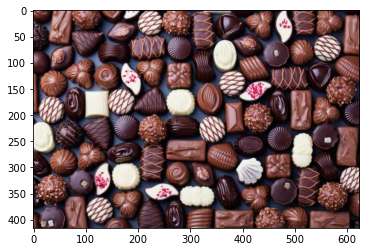

In [26]:
import matplotlib.pyplot as plt
from skimage import data
from skimage import io

image = io.imread('choco.jfif')
plt.imshow(image,cmap=cm.gray)
plt.show()


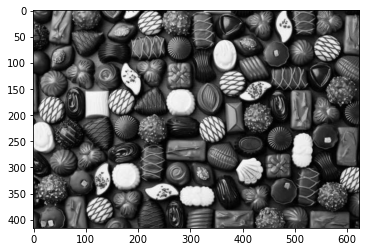

In [36]:
gray_image = rgb2gray(image)
plt.imshow(gray_image, cmap = 'gray');

In [81]:
from PIL import Image
from numpy import*
     
temp=asarray(Image.open('choco.jfif'))
x=temp.shape[0]
y=temp.shape[1]*temp.shape[2]
     
temp.resize((x,y)) # a 2D array
print(temp)

[[128  74  74 ...  21  13  10]
 [131  75  76 ...  21  13  10]
 [161 103 102 ...  19  14  11]
 ...
 [103  48  51 ...  33  18  23]
 [101  49  51 ...  27  12  17]
 [ 98  46  48 ...  62  47  52]]


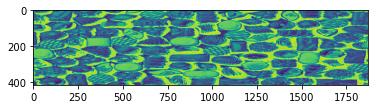

In [197]:
np_im =temp -40
new_im = Image.fromarray(np_im)
plt.imshow(new_im)

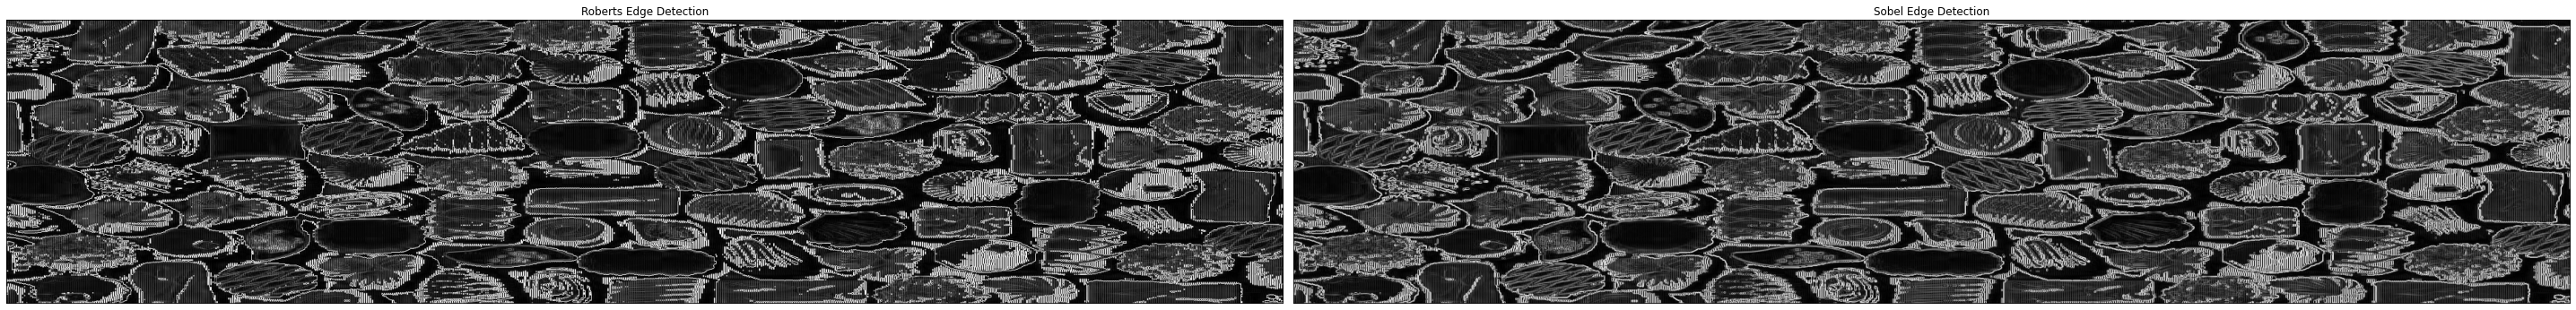

In [217]:
edge_roberts = filters.roberts(new_im)
edge_sobel = filters.sobel(new_im)

fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True,
                         figsize=(40, 40))

axes[0].imshow(edge_roberts, cmap=plt.cm.gray)
axes[0].set_title('Roberts Edge Detection')

axes[1].imshow(edge_sobel, cmap=plt.cm.gray)
axes[1].set_title('Sobel Edge Detection')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()


In [199]:
from skimage.morphology import watershed
from scipy import ndimage as ndi

x = np.arange(12)
y = np.array([3, 0, 1, 2, 1, 3, 2, 0, 2, 4, 4, 0])

seeds = ndi.label(y == 0)[0]
seed_positions = np.argwhere(seeds)[:, 0]

print("Seeds:", seeds)
print("Seed positions:", seed_positions)


Seeds: [0 1 0 0 0 0 0 2 0 0 0 3]
Seed positions: [ 1  7 11]


In [110]:
result = watershed(y, seeds)
print(result)

[1 1 1 1 1 2 2 2 2 2 3 3]


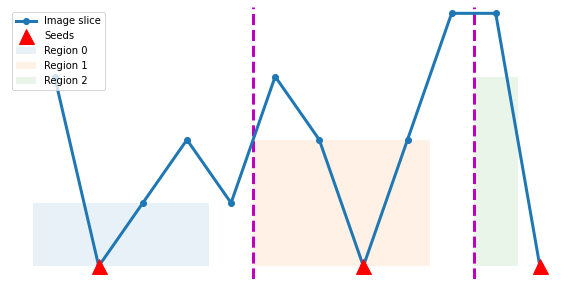

In [111]:
# You can ignore the code below--it's just
# to make a pretty plot of the results.
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(y, '-o', label='Image slice', linewidth=3)
ax.plot(seed_positions, np.zeros_like(seed_positions), 'r^',
        label='Seeds', markersize=15)

for n, label in enumerate(np.unique(result)):
    mask = (result == label)
    ax.bar(x[mask][:-1], result[mask][:-1],
           width=1, label='Region %d' % n,
           alpha=0.1)

ax.vlines(np.argwhere(np.diff(result)) + 0.5, -0.2, 4.1, 'm',
          linewidth=3, linestyle='--')

from scipy.interpolate import interp1d

#c = interp1d(x, y, kind='cubic')
#t = np.linspace(0, len(y) - 1, 100)
#ax.plot(t, c(t), 'g')

ax.legend(loc='upper left', numpoints=1)
ax.axis('off')
ax.set_ylim(-0.2, 4.1);

0.419921875
0.30510349807766624


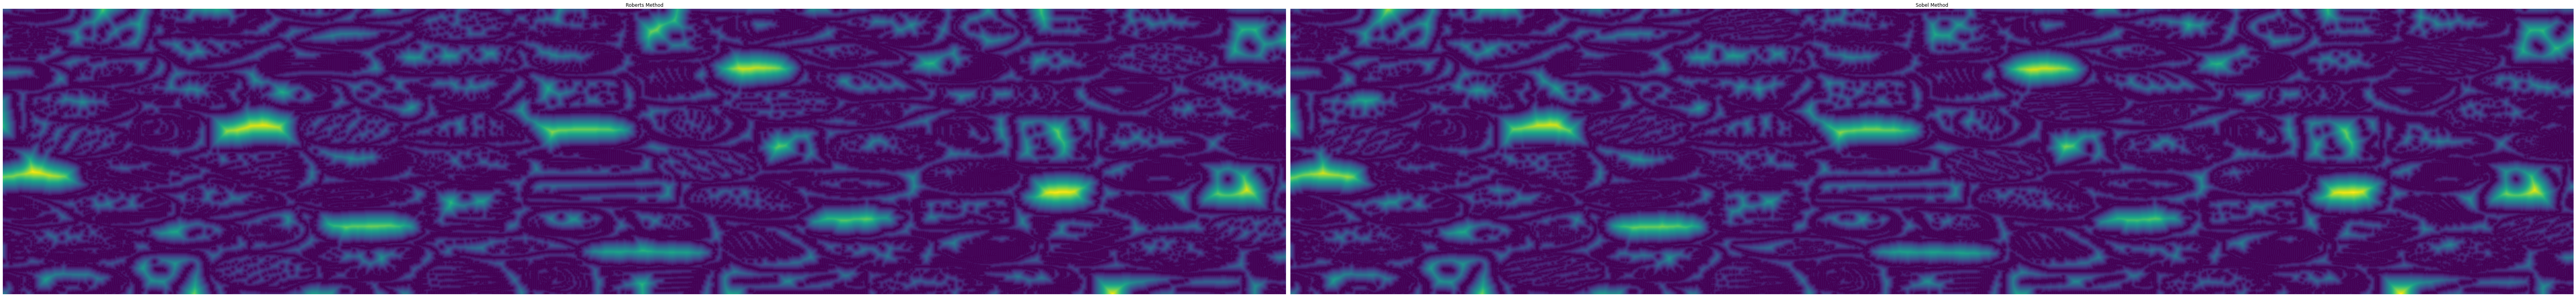

In [200]:
threshold = filters.threshold_otsu(edge_roberts)
print(threshold)

threshold1 = filters.threshold_otsu(edge_sobel)
print(threshold1)
# Euclidean distance transform
# How far do we have to travel from a non-edge to find an edge?
non_edges_roberts = (edge_roberts < threshold)
distance_from_edge = ndi.distance_transform_edt(non_edges_roberts)

non_edges_sobel = (edge_sobel < threshold1)
distance_from_edge1 = ndi.distance_transform_edt(non_edges_sobel)

fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True,
                         figsize=(90, 80))
axes[0].imshow(distance_from_edge, cmap='viridis')
axes[0].set_title('Roberts Method')

axes[1].imshow(distance_from_edge1, cmap='viridis')
axes[1].set_title('Sobel Method')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

Coordinates shape: (321, 2)


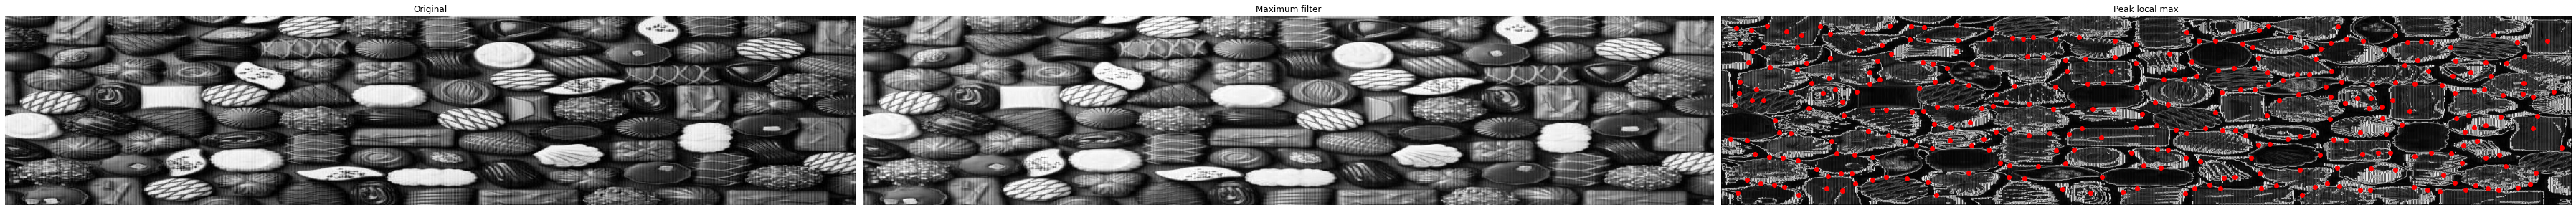

In [195]:
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage import data, img_as_float

# image_max is the dilation of im with a 20*20 structuring element
# It is used within peak_local_max function
image_max = ndi.maximum_filter(temp, size=2, mode='constant')

# Comparison between image_max and im to find the coordinates of local maxima
coordinates = peak_local_max(edge_sobel, min_distance=20)
print("Coordinates shape:", coordinates.shape)

# display results
fig, axes = plt.subplots(1, 3, figsize=(50, 30), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(temp, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('Original')

ax[1].imshow(image_max, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('Maximum filter')

ax[2].imshow(edge_roberts, cmap=plt.cm.gray)
ax[2].autoscale(False)
ax[2].plot(coordinates[:, 1], coordinates[:, 0], 'ro');
ax[2].axis('off')
ax[2].set_title('Peak local max')

fig.tight_layout()
plt.show()